[*********************100%***********************]  7 of 7 completed
/usr/local/lib/python3.9/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/usr/local/lib/python3.9/site-packages/riskfolio/RiskFunctions.py:348: RuntimeWarning: overflow encountered in exp
  value = np.mean(np.exp(-1 / z * a), axis=0)
/usr/local/lib/python3.9/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/usr/local/lib/python3.9/site-packages/riskfolio/RiskFunctions.py:348: RuntimeWarning: overflow encountered in exp
  value = np.mean(np.exp(-1 / z * a), axis=0)
/usr/local/lib/python3.9/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  w

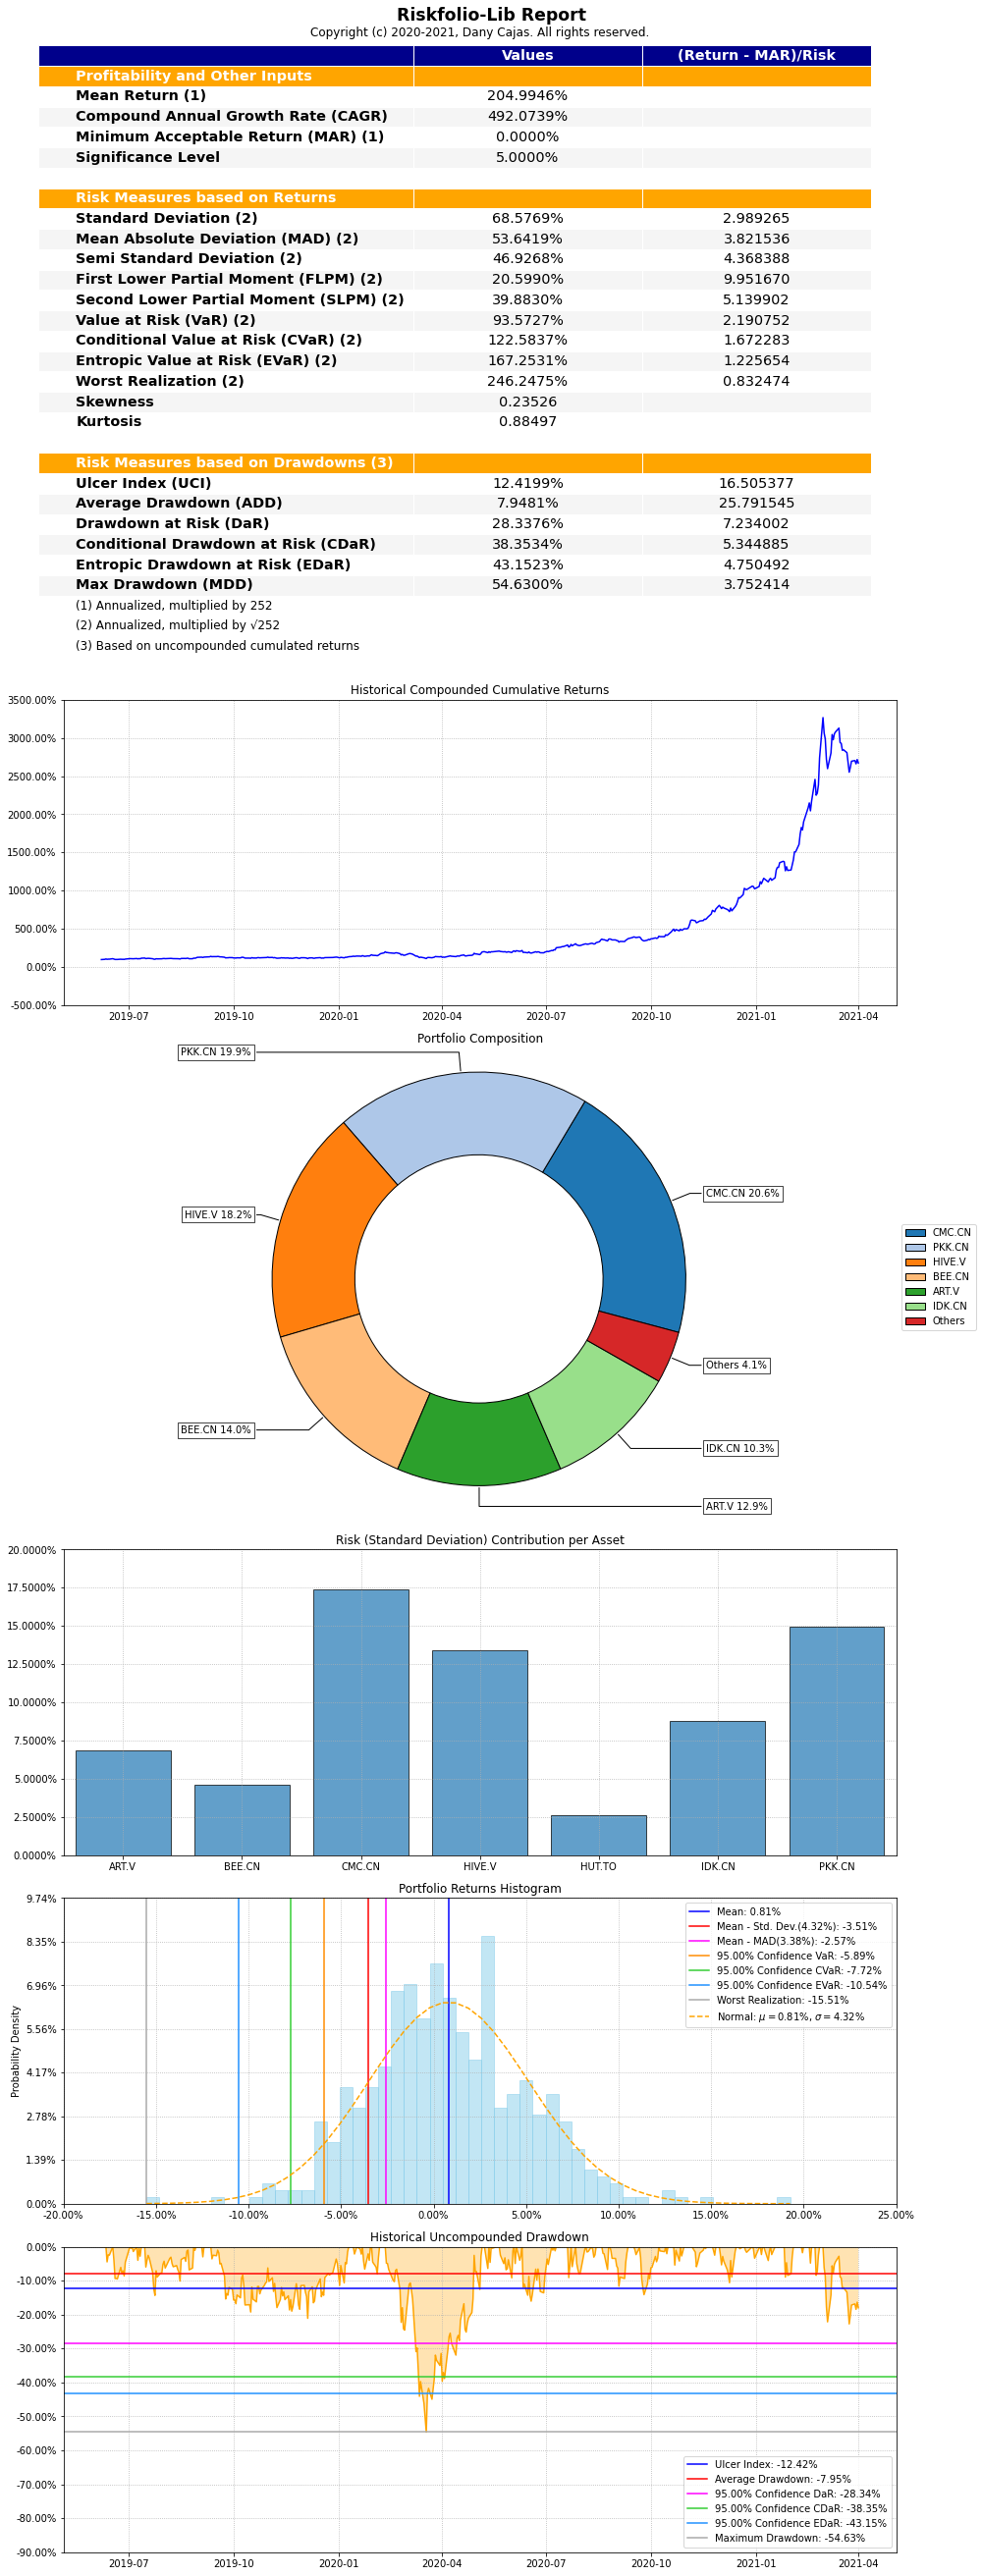

In [3]:
#@title Default title text
import numpy as np
import pandas as pd
import yfinance as yf
import riskfolio.Portfolio as pf
import riskfolio.Reports as rp
from stocks import stocks
yf.pdr_override()

# Date range
start = '2019-06-06'
end = '2021-04-02'

# Tickers of assets
tickers = stocks
tickers.sort()

# Downloading the data
data = yf.download(tickers, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = tickers
assets = data.pct_change().dropna()

Y = assets

# Creating the Portfolio Object
port = pf.Portfolio(returns=Y)

# To display dataframes values in percentage format
pd.options.display.float_format = '{:.4%}'.format

# Choose the risk measure
rm = 'MV'  # Standard Deviation

# Estimate inputs of the model (historical estimates)
method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)
returns = port.returns
# Estimate the portfolio that maximizes the risk adjusted return ratio
w = port.optimization(model='Classic', rm=rm, obj='Sharpe', rf=0.0, l=0, hist=True)
ax = rp.jupyter_report(returns, w, rm='MV', rf=0, alpha=0.05, height=6, width=14,
                       others=0.05, nrow=25)